This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)


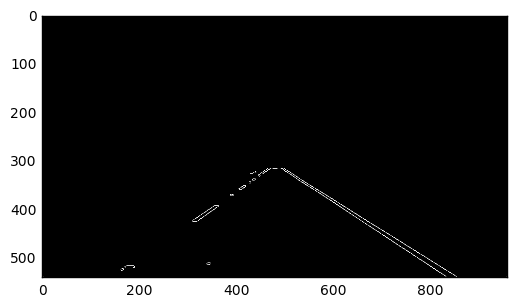

In [64]:
#Import packages
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
 #call as plt.imshow(gray, cmap='gray') to show a grayscaled image


#GRAYSCALE & NOISE FILTERING
    #Function begins with taking the input image and converting it to grayscale 
kernel_size = 5 #Set kernel size for Gaussian smoothing; Must be an odd number (3, 5, 7...)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) #Conversion to grayscale
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0) #Gaussian smoothing function 


#EDGE DETECTION
    # After 'flattening' the RGB image into grayscale and reducing noise, use the Canny function to detect edges. 
# Threshold parameters for Canny edge detection:
low_threshold = 10
high_threshold = 100
edges = cv2.Canny(blur_gray, low_threshold, high_threshold) # Returns an image of contours/edges

#MASKING
    # We now need to create a mask to define an area of where the lane is in the image. 
    # Ideally, this would be a dynamic mask, but for the purposes of this lesson, we create a static mask. 
mask = np.zeros_like(edges)   
ignore_mask_color = 255   

    # We use cv2.fillPoly() to remove the regions where the lane cannot be by defining a four-sided mask
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(450, 315), (500, 315), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color) # Fills verticies in the empty mask with a polygon
masked_edges = cv2.bitwise_and(edges, mask) # Processes the Edges image and removes pixels outside the mask
plt.imshow(masked_edges, cmap='gray')


#HOUGH TRANSFORM
    # Performing the hough transform will allow us to find pixels that are roughly congregated along in lines  

# Hough transform parameters
rho = 1 # Distance resolution in pixels of the Hough grid
theta = np.pi/180 # Angular resolution in radians of the Hough grid
threshold = 15 # Minimum number of votes (intersections in Hough grid cell)
min_line_length = 120 # minimum number of pixels making up a line
max_line_gap = 150    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on


# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)


# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),3)


# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 



# Draw the lines on the edge image
result = cv2.addWeighted(image, 1, line_image, 1, 0) 

